Openmax Thresholding 0.40 - Acc. Known: 79.77%, Acc. Unk.: 61.29%, Pre. Unk.: 32.68%, Rec. Unk.: 1.79%, Balanced Acc.: 52.74%, Kappa: 48.60%


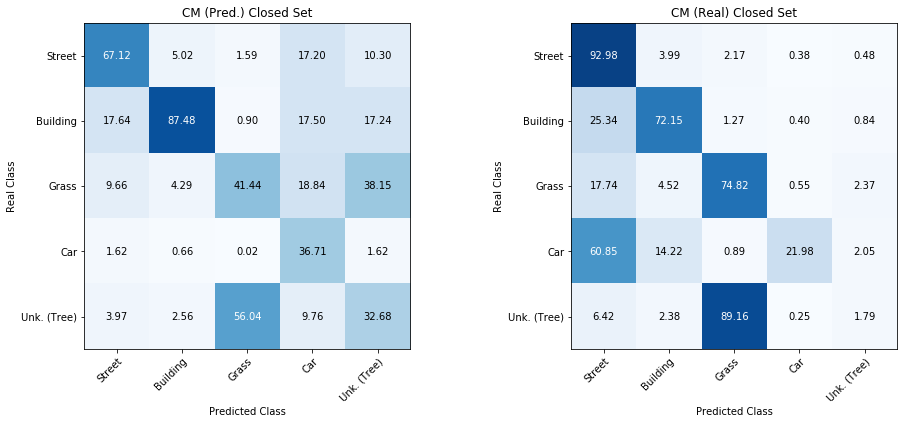

Openmax Thresholding 0.45 - Acc. Known: 79.44%, Acc. Unk.: 61.29%, Pre. Unk.: 30.66%, Rec. Unk.: 2.85%, Balanced Acc.: 52.63%, Kappa: 48.59%


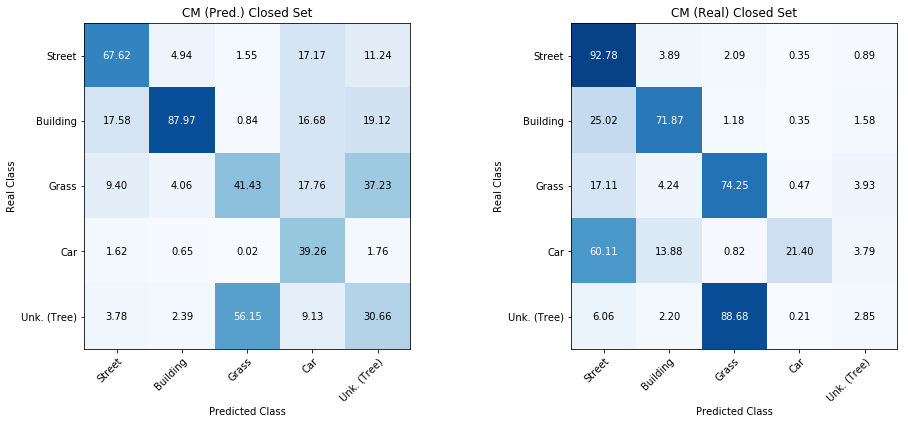

Openmax Thresholding 0.50 - Acc. Known: 78.85%, Acc. Unk.: 61.19%, Pre. Unk.: 28.48%, Rec. Unk.: 4.33%, Balanced Acc.: 52.39%, Kappa: 48.47%


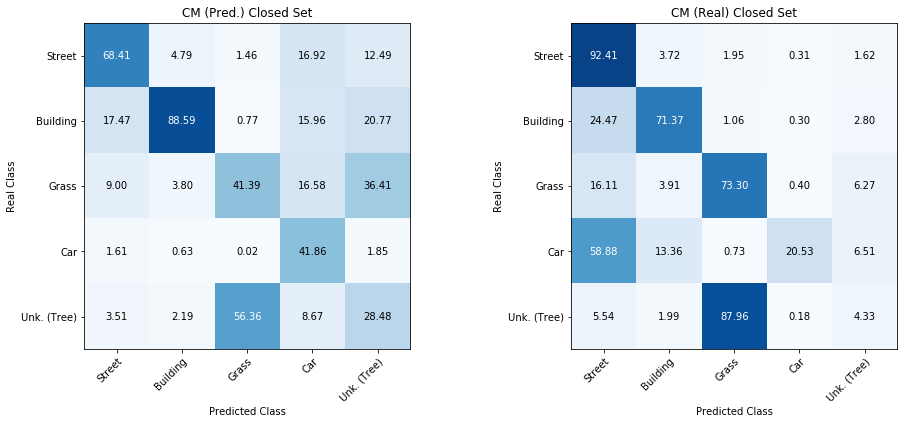

Openmax Thresholding 0.55 - Acc. Known: 77.97%, Acc. Unk.: 60.91%, Pre. Unk.: 25.87%, Rec. Unk.: 5.98%, Balanced Acc.: 51.97%, Kappa: 48.11%


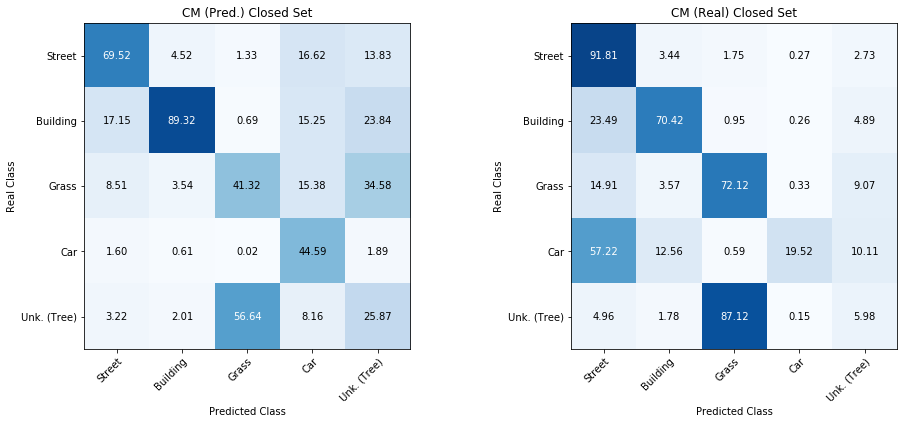

Openmax Thresholding 0.60 - Acc. Known: 77.03%, Acc. Unk.: 60.59%, Pre. Unk.: 24.59%, Rec. Unk.: 7.65%, Balanced Acc.: 51.53%, Kappa: 47.70%


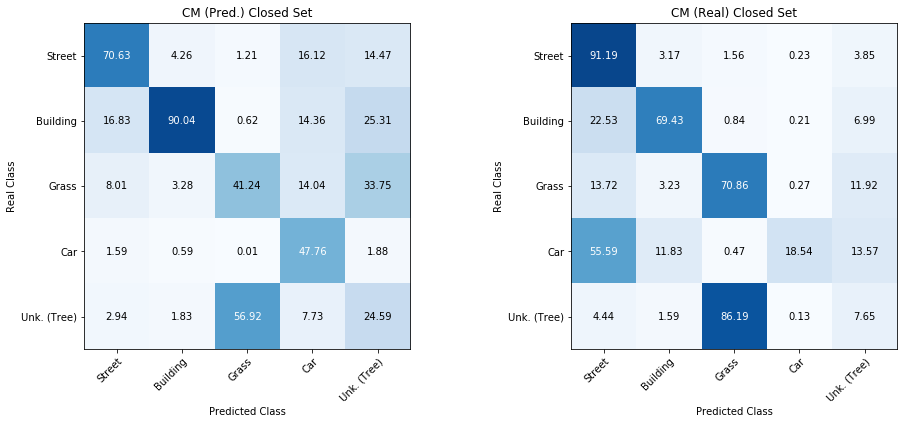

Openmax Thresholding 0.65 - Acc. Known: 76.04%, Acc. Unk.: 60.25%, Pre. Unk.: 23.88%, Rec. Unk.: 9.41%, Balanced Acc.: 51.07%, Kappa: 47.26%


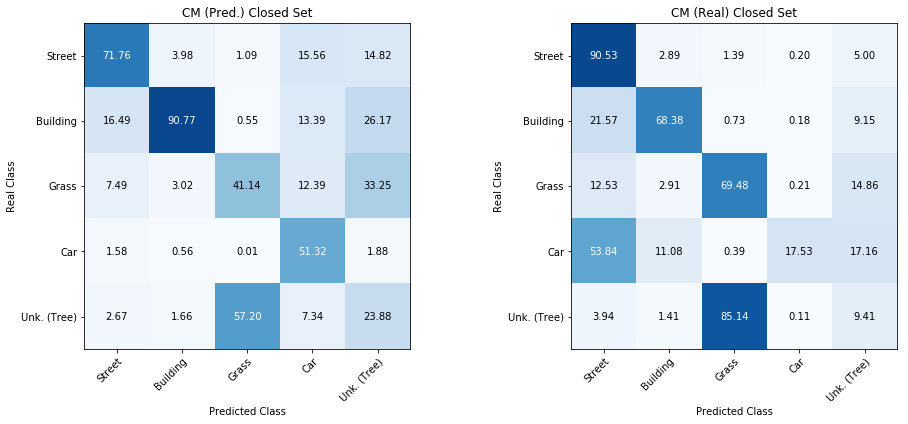

Openmax Thresholding 0.70 - Acc. Known: 74.93%, Acc. Unk.: 59.85%, Pre. Unk.: 23.40%, Rec. Unk.: 11.28%, Balanced Acc.: 50.54%, Kappa: 46.74%


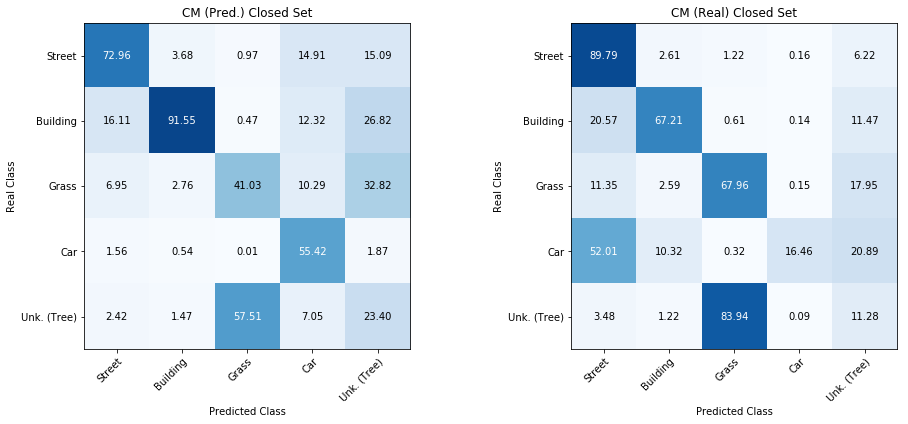

Openmax Thresholding 0.75 - Acc. Known: 73.67%, Acc. Unk.: 59.38%, Pre. Unk.: 23.09%, Rec. Unk.: 13.36%, Balanced Acc.: 49.93%, Kappa: 46.13%


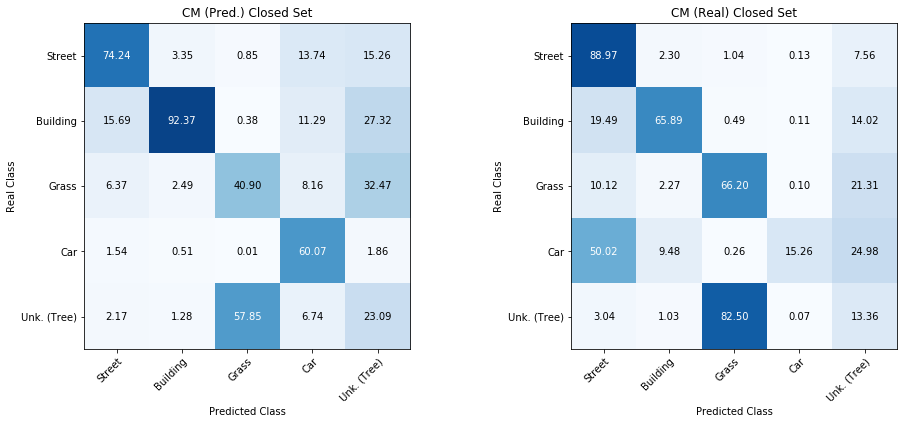

Openmax Thresholding 0.80 - Acc. Known: 72.15%, Acc. Unk.: 58.80%, Pre. Unk.: 22.99%, Rec. Unk.: 15.83%, Balanced Acc.: 49.21%, Kappa: 45.39%


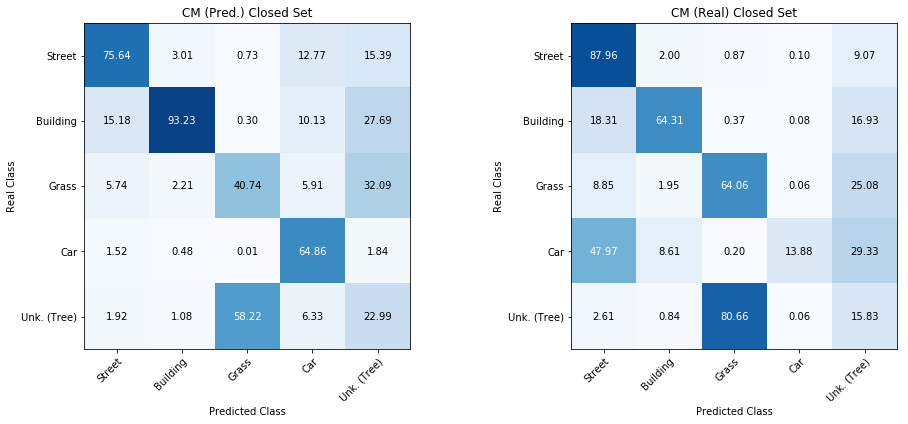

Openmax Thresholding 0.85 - Acc. Known: 70.21%, Acc. Unk.: 58.09%, Pre. Unk.: 23.12%, Rec. Unk.: 19.05%, Balanced Acc.: 48.31%, Kappa: 44.46%


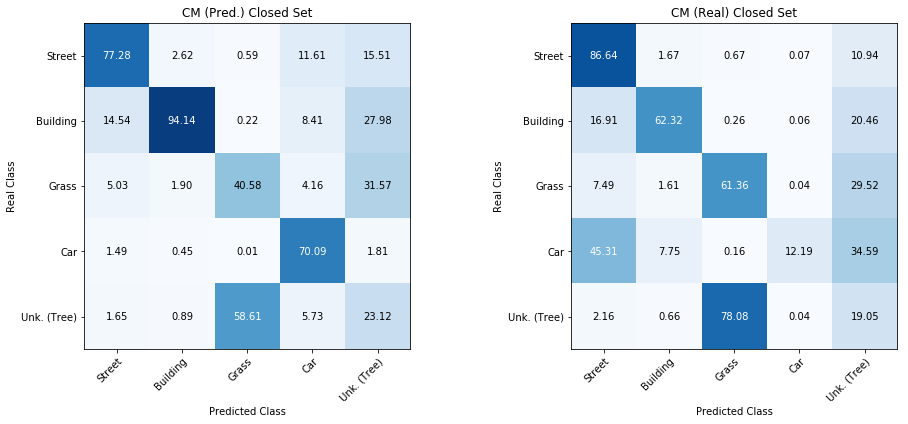

Openmax Thresholding 0.90 - Acc. Known: 67.40%, Acc. Unk.: 57.08%, Pre. Unk.: 23.61%, Rec. Unk.: 23.86%, Balanced Acc.: 47.10%, Kappa: 43.14%


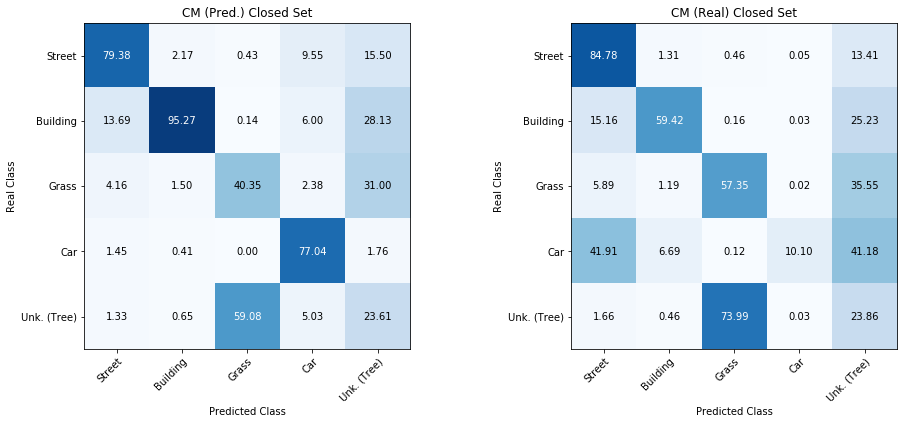

Openmax Thresholding 0.95 - Acc. Known: 62.13%, Acc. Unk.: 55.35%, Pre. Unk.: 25.01%, Rec. Unk.: 33.52%, Balanced Acc.: 45.10%, Kappa: 40.87%


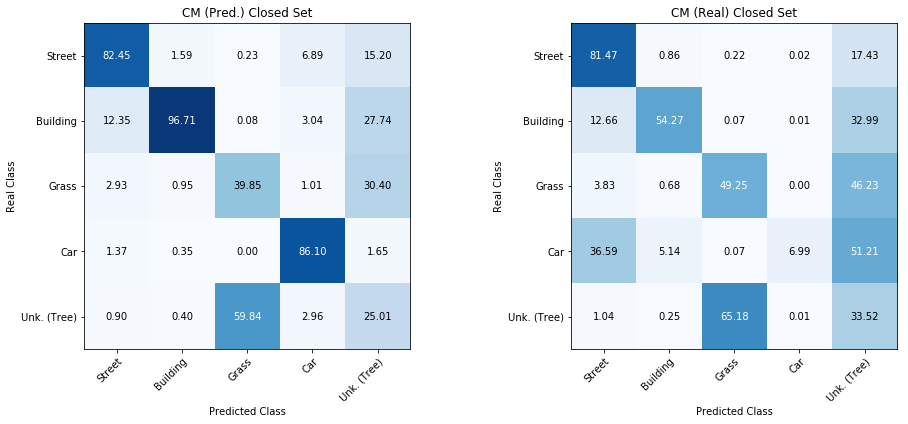

In [1]:
import os
import numpy as np
import matplotlib as mplt

from skimage import io

from sklearn import metrics

from matplotlib import pyplot as plt
from matplotlib import lines

%matplotlib inline

def plot_confusion_matrix(cm, classes, ax, title, cmap):
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=100.0)
    if title is not None:
        ax.set_title(title)
    
    # ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticklabels=classes, yticklabels=classes,
           ylabel='Real Class',
           xlabel='Predicted Class')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

'''
Classes:
    0 = Street
    1 = Building
    2 = Grass
    3 = Tree
    4 = Car
    5 = Surfaces
    6 = Boundaries
'''

##########################################################################################
##########################################################################################
##########################################################################################

epoch = 200

# conv_name = 'unet'
# conv_name = 'fcnresnet50'
conv_name = 'fcnwideresnet50'
# conv_name = 'segnet'

dataset_name = 'Vaihingen'
# dataset_name = 'Potsdam'


# n_known = 4
# class_unk = 0
# classes = ['', 'Building', 'Grass', 'Tree', 'Car', 'Unk. (Street)']

# n_known = 4
# class_unk = 1
# classes = ['', 'Street', 'Grass', 'Tree', 'Car', 'Unk. (Building)']

# n_known = 4
# class_unk = 2
# classes = ['', 'Street', 'Building', 'Tree', 'Car', 'Unk. (Grass)']

n_known = 4
class_unk = 3
classes = ['', 'Street', 'Building', 'Grass', 'Car', 'Unk. (Tree)']

# n_known = 4
# class_unk = 4
# classes = ['', 'Street', 'Building', 'Grass', 'Tree', 'Unk. (Car)']

# n_known = 3
# class_unk = '0_1'
# classes = ['', 'Grass', 'Tree', 'Car', 'Unk. (Street/Building)']

# n_known = 3
# class_unk = '2_3'
# classes = ['', 'Street', 'Building', 'Car', 'Unk. (Grass/Tree)']

# n_known = 2
# class_unk = '0_1_4'
# classes = ['', 'Grass', 'Tree', 'Unk. (Street/Building/Car)']

# n_known = 2
# class_unk = '2_3_4'
# classes = ['', 'Street', 'Building', 'Unk. (Grass/Tree/Car)']

img_dir = './outputs/%s_%s_openset_%s/epoch_%d/' % (conv_name, dataset_name, str(class_unk), epoch)
# img_dir = './outputs/backup_%s_%s_openpca_full_%s/epoch_%d/' % (conv_name, dataset_name, str(class_unk), epoch)

##########################################################################################
##########################################################################################

thresholds = [0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f)) and '_imag_' in f]

tru_list = []
pro_list = []

for i, f in enumerate(files):

    img_path = os.path.join(img_dir, f)
    tru_path = os.path.join(img_dir, f.replace('_imag_', '_true_'))
    pro_path = os.path.join(img_dir, f.replace('_imag_', '_prob_').replace('.png', '.npy'))

    try:
        tru = io.imread(tru_path)
        pro = np.load(pro_path)
    except:
        print('Error in loading sample "' + f + '"')
        break

    tru_list.append(tru)
    pro_list.append(pro)

pro_list = np.asarray(pro_list)
tru_list = np.asarray(tru_list)

cm_list = []
acc_known_list = []
pre_unk_list = []
rec_unk_list = []
acc_unknown_list = []
acc_mean_list = []
acc_bal_list = []
kappa_list = []

for t in thresholds:
    
    pos_np = pro_list.argmax(axis=1)
    pos_np[pro_list.max(axis=1) < t] = n_known
    
    pos_np = pos_np.ravel()
    tru_np = tru_list.ravel()

    tru_valid = tru_np[tru_np < 5]
    pos_valid = pos_np[tru_np < 5]

    cm = metrics.confusion_matrix(tru_valid, pos_valid)

    tru_known = 0.0
    sum_known = 0.0

    for c in range(n_known):
        tru_known += float(cm[c, c])
        sum_known += float(cm[c, :].sum())

    acc_known = float(tru_known) / float(sum_known)

    tru_unknown = float(cm[n_known, n_known])
    sum_unknown_real = float(cm[n_known, :].sum())
    sum_unknown_pred = float(cm[:, n_known].sum())

    pre_unknown = float(tru_unknown) / float(sum_unknown_pred)
    rec_unknown = float(tru_unknown) / float(sum_unknown_real)

    acc_unknown = (tru_known + tru_unknown) / (sum_known + sum_unknown_real)

    acc_mean = (acc_known + acc_unknown) / 2.0

    bal = metrics.balanced_accuracy_score(tru_valid, pos_valid)
    kap = metrics.cohen_kappa_score(tru_valid, pos_valid)

    print('Openmax Thresholding %.2f - Acc. Known: %.2f%%, Acc. Unk.: %.2f%%, Pre. Unk.: %.2f%%, Rec. Unk.: %.2f%%, Balanced Acc.: %.2f%%, Kappa: %.2f%%' % (t, acc_known * 100.0, acc_unknown * 100.0, pre_unknown * 100.0, rec_unknown * 100.0, bal * 100.0, kap * 100.0))

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    cm_pred = cm.astype(np.float32)
    for c in range(n_known + 1):
        cm_pred[:(n_known + 1), c] /= cm_pred[:(n_known + 1), c].sum()
    plot_confusion_matrix(cm_pred[:(n_known + 1), :(n_known + 1)] * 100.0, classes, ax[0], 'CM (Pred.) Closed Set', plt.cm.Blues)

    cm_real = cm.astype(np.float32)
    for c in range(n_known + 1):
        cm_real[c, :(n_known + 1)] /= cm_real[c, :(n_known + 1)].sum()
    plot_confusion_matrix(cm_real[:(n_known + 1), :(n_known + 1)] * 100.0, classes, ax[1], 'CM (Real) Closed Set', plt.cm.Blues)

    plt.show()

    acc_known_list.append(acc_known)
    pre_unk_list.append(pre_unknown)
    rec_unk_list.append(rec_unknown)
    acc_unknown_list.append(acc_unknown)
    acc_mean_list.append(acc_mean)
    acc_bal_list.append(bal)
    kappa_list.append(kap)

thresholds = np.asarray(thresholds)
acc_known_list = np.asarray(acc_known_list) * 100
pre_unk_list = np.asarray(pre_unk_list) * 100
rec_unk_list = np.asarray(rec_unk_list) * 100
acc_unknown_list = np.asarray(acc_unknown_list) * 100
acc_mean_list = np.asarray(acc_mean_list) * 100
acc_bal_list = np.asarray(acc_bal_list) * 100
kappa_list = np.asarray(kappa_list) * 100

In [2]:
for i in range(len(acc_known_list)):
    
    print('%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f' % (acc_known_list[i],
                                                  acc_unknown_list[i],
                                                  pre_unk_list[i],
                                                  rec_unk_list[i],
                                                  acc_bal_list[i],
                                                  kappa_list[i]))

79.77	61.29	32.68	1.79	52.74	48.60
79.44	61.29	30.66	2.85	52.63	48.59
78.85	61.19	28.48	4.33	52.39	48.47
77.97	60.91	25.87	5.98	51.97	48.11
77.03	60.59	24.59	7.65	51.53	47.70
76.04	60.25	23.88	9.41	51.07	47.26
74.93	59.85	23.40	11.28	50.54	46.74
73.67	59.38	23.09	13.36	49.93	46.13
72.15	58.80	22.99	15.83	49.21	45.39
70.21	58.09	23.12	19.05	48.31	44.46
67.40	57.08	23.61	23.86	47.10	43.14
62.13	55.35	25.01	33.52	45.10	40.87
